In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
X,y = make_classification(n_samples=300,n_features=2,n_classes=4,n_redundant=0,n_clusters_per_class=1,n_informative=2)

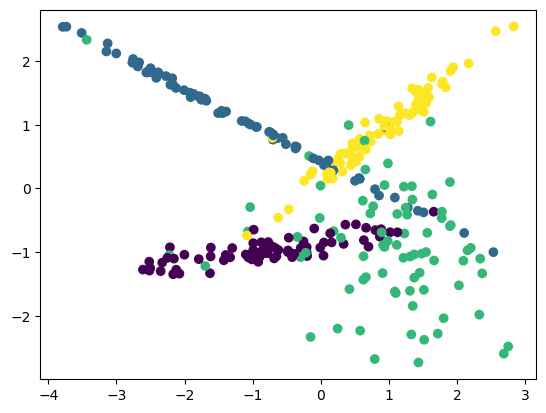

In [5]:
plt.scatter(X[:,0],X[:,1],c=y);

In [6]:
def plot_decision_boundary(data,labels,clf):
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))
    Z = np.array(clf.predict(np.c_[xx.ravel(),yy.ravel()]))
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap='cool')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[:,0],data[:,1],c=labels,cmap='hot',s=20)
    plt.show()

### Question a (3 points)

In [9]:
print(len(X), len(y), 0.2*len(X))

300 300 60.0


In [10]:
train = X[:240]
test = X[240:]

In [11]:
y_train = y[:240]
y_test = y[240:]

### Question b (5 points)

In [12]:
t_params = ((10,10,10), (10, 10, 10), (10, 10, 10))

In [13]:
for p1,p2,p3 in t_params:
    
    t_clf = DecisionTreeClassifier(max_depth=p1,min_samples_leaf=p2, random_state = p3)
    t_clf.fit(train, y_train)
    t_pred_test = t_clf.predict(test)
    print(accuracy_score(y_test, t_pred_test))
    print(confusion_matrix(t_pred_test,y_test))
    

0.7833333333333333
[[20  0  6  1]
 [ 0 11  1  1]
 [ 3  0  6  0]
 [ 0  0  1 10]]
0.7833333333333333
[[20  0  6  1]
 [ 0 11  1  1]
 [ 3  0  6  0]
 [ 0  0  1 10]]
0.7833333333333333
[[20  0  6  1]
 [ 0 11  1  1]
 [ 3  0  6  0]
 [ 0  0  1 10]]


### Question c (5 points)

In [33]:
rf_params = ((10,'sqrt',50,20), (20,'sqrt',20,40), (30,'sqrt',10,50))

In [34]:
for p1,p2,p3,p4 in rf_params:
    
    rf_clf = RandomForestClassifier(n_estimators=p1, max_features=p2, min_samples_leaf=p3, max_depth=p4)
    rf_clf.fit(train, y_train)
    rf_pred_test = rf_clf.predict(test)
    print(accuracy_score(y_test, rf_pred_test))
    print(confusion_matrix(rf_pred_test,y_test))
    

0.7333333333333333
[[ 6  6  0  0]
 [ 1 10  0  0]
 [ 3  2 12  1]
 [ 1  2  0 16]]
0.75
[[ 6  5  0  0]
 [ 2 11  0  0]
 [ 3  2 12  1]
 [ 0  2  0 16]]
0.7666666666666667
[[ 6  4  0  0]
 [ 2 12  0  0]
 [ 3  2 12  1]
 [ 0  2  0 16]]


### Question d (5 points)

In [35]:
ada_params = ((2,5,0.1), (4,10,0.5), (10,20,0.3))

In [36]:
for p1,p2,p3 in ada_params:
    
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=p1),n_estimators=p2, learning_rate=p3)
    ada_clf.fit(train, y_train)
    ada_pred_test = ada_clf.predict(test)
    print(accuracy_score(y_test, ada_pred_test))
    print(confusion_matrix(ada_pred_test,y_test))
    

0.7333333333333333
[[ 6  6  0  0]
 [ 2 11  0  1]
 [ 3  2 12  1]
 [ 0  1  0 15]]
0.7833333333333333
[[ 9  6  1  1]
 [ 1 12  0  0]
 [ 1  1 11  1]
 [ 0  1  0 15]]
0.8
[[ 8  5  0  0]
 [ 1 12  0  0]
 [ 2  1 12  1]
 [ 0  2  0 16]]


### Question e (10 points)

In [38]:
gb_clf = LGBMClassifier()

In [ ]:
gb_clf.fit(train, y_train)

In [ ]:
gb_pred_valid = gb_clf.predict(valid)

In [ ]:
accuracy_score(y_valid, pred_valid)

In [ ]:
confusion_matrix(pred_valid,y_valid)

### Question f (2 points)

In [4]:
plot_decision_boundary(valid, y_valid, t_clf)

NameError: name 'plot_decision_boundary' is not defined

In [ ]:
t_pred_valid